In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [4]:
def isodata (img,C):
    v = np.zeros((C,img.shape[2]))
    v2 = np.zeros((C,img.shape[2]))
    
    for i in list(range(C)):
        v[i,:]=(random.randint(10,255),random.randint(10,255),random.randint(10,255))

    resimg = np.ones((img.shape[0], img.shape[1]), dtype=int)
    
    while not (np.array_equal(v,v2)):
      ##MODIFICACIÓN DE LA MATRIZ CON LAS CLASES
        clase = 0
        for k in list(range(img.shape[0])):
            for j in list(range(img.shape[1])):
                dist_min=1000000000
                for i in list(range(C)):#var c
                    dist=math.sqrt(sum(((v[i]-img[k][j])**2)))
                    if dist<dist_min : 
                        dist_min=dist
                        clase = i
                resimg[k][j]=clase
                
      ##DICCIONARIO QUE VA SUMANDO POR CLASE Y POR R,G,B
        dic={c:([0,0,0],0) for c in list(range(C))}
        for k in list(range(resimg.shape[0])):
            for j in list (range(resimg.shape[1])):
                 for z in list(range(C)):
                    if resimg[k][j]==z:
                        dic[z] = ([dic[z][0][x]+img[k][j][x] for x in list(range(3))],dic[z][1]+1)
                
      ##ASIGNACIÓN DE NUEVOS CENTROS Y CAMBIAMOS V2 PARA MANTENER 
      ##CONDICIÓN DEL WHILE
        v2=v.copy()
        for i in (list(range(C))):
            if dic[i][1]==0:
                v[i,:]=[0.,0.,0.]
            else:
                v[i,:]=[(dic[i][0][j]/dic[i][1]) for j in range(len(dic[i][0]))]

    return resimg
            
    

In [5]:
def seudo (img):
    resimg=np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    i=0
    while i<img.shape[0]:
        j=0
        while j < img.shape[1]:
            if img[i,j] == 0:
                resimg[i,j,:]=[255,0,0]
            elif img[i,j] == 1:
                resimg[i,j,:] = [0,255,0]
            elif img[i,j] == 2:
                resimg[i,j,:] = [0,0,255]
            elif img[i,j] == 3:
                resimg[i,j,:] = [255,255,0]
            elif img[i,j] == 4:
                resimg[i,j,:] = [0,255,255]
            elif img[i,j] == 5:
                resimg[i,j,:] = [255,0,255]
            else:
                resimg[i,j,:] = [0,0,0]
            j = j +1
        i=i+1
    return resimg
            
             

In [6]:
def diezmado(img,R):
    res=img.copy()
    r_new = int(1/R)
    res = img[0:-1:r_new,0:-1:r_new]
    return res

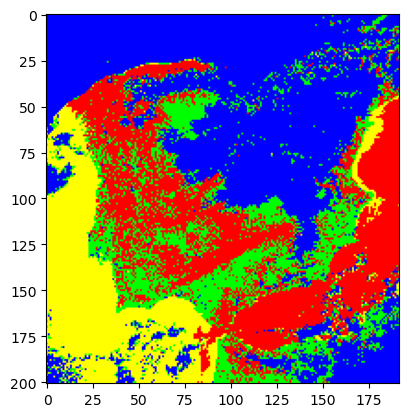

In [7]:
img = cv2.imread('imgpack/Filomena.jpg')
im=diezmado(img,0.1)
res= isodata(im,4)
res_seudo = seudo(res)
plt.figure(1)
plt.imshow(res_seudo)